<a href="https://colab.research.google.com/github/JasRockr/Python/blob/main/Algoritmos_de_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Algoritmo Complejidad
0             DFS    O(V + E)
1             BFS    O(V + E)
2        Dijkstra      O(V^2)
3    Bellman-Ford    O(V * E)
4  Floyd-Warshall      O(V^3)
Nodos visitados por DFS: {0, 1}
Tiempo de ejecución de DFS: 0.00014972686767578125 segundos
Nodos visitados por BFS: {0, 1}
Tiempo de ejecución de BFS: 0.00011539459228515625 segundos
Distancias mínimas por Dijkstra: {0: 0, 1: 1, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: 2, 8: 2}
Tiempo de ejecución de Dijkstra: 0.0003039836883544922 segundos
Distancias mínimas por Bellman-Ford: [0, 1, 2, 1, 1, 2, 1, 2, 2]
Tiempo de ejecución de Bellman-Ford: 0.0015895366668701172 segundos
Distancias mínimas por Floyd-Warshall:
Desde el nodo 0: [0, 1, 2, 1, 1, 2, 1, 2, 2]
Desde el nodo 1: [1, 0, 1, 2, 1, 1, 2, 3, 2]
Desde el nodo 2: [2, 1, 0, 1, 2, 2, 1, 2, 2]
Desde el nodo 3: [1, 2, 1, 0, 2, 2, 2, 2, 1]
Desde el nodo 4: [1, 1, 2, 2, 0, 2, 2, 2, 1]
Desde el nodo 5: [2, 1, 2, 2, 2, 0, 1, 2, 1]
Desde el nodo 6: [1, 2, 1, 2, 2, 1, 0, 1, 

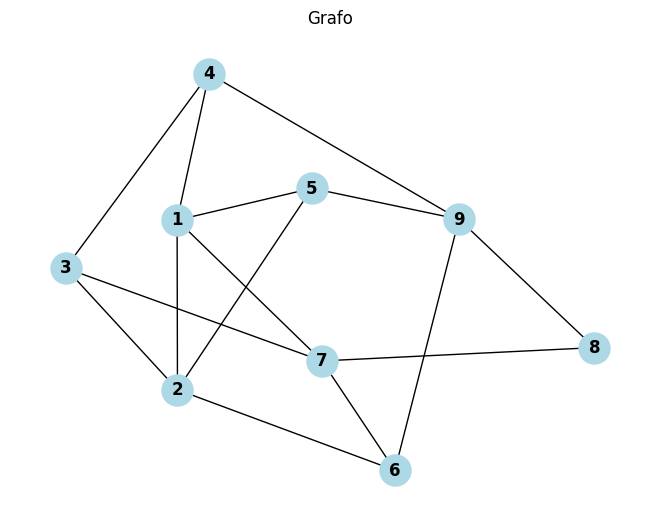

In [1]:
# Instalación de biblioteca NetworkX para trabajar con grafos
!pip install networkx

# Importación de bibliotecas necesarias
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time

# Crear un grafo de ejemplo con su matriz de adyacencia
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 5)])

# Agregar más nodos y aristas
new_nodes = [6, 7, 8, 9]
G.add_nodes_from(new_nodes)
new_edges = [(6, 7), (7, 8), (8, 9), (9, 6), (2, 6), (5, 2), (4, 3), (7, 3), (9, 4), (9, 5), (7, 1)]
G.add_edges_from(new_edges)

# Obtener la matriz de adyacencia
adj_matrix = nx.adjacency_matrix(G).toarray()

# Visualizar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=12, font_color="black", font_weight="bold")
plt.title("Grafo")

# Algoritmo de búsqueda en profundidad (DFS)
def dfs(graph, start):
    visited = set()
    stack = [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(set(graph[vertex]) - visited)
    return visited

# Algoritmo de búsqueda en amplitud (BFS)
def bfs(graph, start):
    visited = set()
    queue = [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(set(graph[vertex]) - visited)
    return visited

# Algoritmo de Dijkstra
def dijkstra(graph, start):
    shortest_path = {}
    unvisited_nodes = set(range(len(graph)))
    for node in unvisited_nodes:
        shortest_path[node] = float('inf')
    shortest_path[start] = 0

    while unvisited_nodes:
        min_node = None
        for node in unvisited_nodes:
            if min_node is None:
                min_node = node
            elif shortest_path[node] < shortest_path[min_node]:
                min_node = node

        current_weight = shortest_path[min_node]
        for neighbor, weight in enumerate(graph[min_node]):
            if weight > 0:
                weight += current_weight
                if weight < shortest_path[neighbor]:
                    shortest_path[neighbor] = weight
        unvisited_nodes.remove(min_node)

    return shortest_path

# Algoritmo de Bellman-Ford
def bellman_ford(graph, start):
    distance = [float("inf")] * len(graph)
    distance[start] = 0

    for _ in range(len(graph) - 1):
        for u, v, w in edges(graph):
            if distance[u] != float("inf") and distance[u] + w < distance[v]:
                distance[v] = distance[u] + w

    return distance

# Función para obtener las aristas y sus pesos
def edges(graph):
    for i in range(len(graph)):
        for j in range(len(graph[0])):
            if graph[i][j] != 0:
                yield i, j, graph[i][j]

# Algoritmo de Floyd-Warshall
def floyd_warshall(graph):
    n = len(graph)
    distance = [[float("inf") for _ in range(n)] for _ in range(n)]

    for i in range(n):
        distance[i][i] = 0

    for i, j, w in edges(graph):
        distance[i][j] = w

    for k in range(n):
        for i in range(n):
            for j in range(n):
                distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])

    return distance

# Ejecutar algoritmos y medir el tiempo
start_time = time.time()
dfs_result = dfs(adj_matrix, 1)
dfs_time = time.time() - start_time

start_time = time.time()
bfs_result = bfs(adj_matrix, 1)
bfs_time = time.time() - start_time

start_time = time.time()
dijkstra_result = dijkstra(adj_matrix, 0)
dijkstra_time = time.time() - start_time

start_time = time.time()
bellman_ford_result = bellman_ford(adj_matrix, 0)
bellman_ford_time = time.time() - start_time

start_time = time.time()
floyd_warshall_result = floyd_warshall(adj_matrix)
floyd_warshall_time = time.time() - start_time

# Crear una tabla con la complejidad Big O de cada algoritmo
complexity_df = pd.DataFrame({
    'Algoritmo': ['DFS', 'BFS', 'Dijkstra', 'Bellman-Ford', 'Floyd-Warshall'],
    'Complejidad': ['O(V + E)', 'O(V + E)', 'O(V^2)', 'O(V * E)', 'O(V^3)'],
})

# Mostrar la tabla de complejidad
print(complexity_df)

# Mostrar resultados y tiempo de ejecución
print("Nodos visitados por DFS:", dfs_result)
print("Tiempo de ejecución de DFS:", dfs_time, "segundos")
print("Nodos visitados por BFS:", bfs_result)
print("Tiempo de ejecución de BFS:", bfs_time, "segundos")
print("Distancias mínimas por Dijkstra:", dijkstra_result)
print("Tiempo de ejecución de Dijkstra:", dijkstra_time, "segundos")
print("Distancias mínimas por Bellman-Ford:", bellman_ford_result)
print("Tiempo de ejecución de Bellman-Ford:", bellman_ford_time, "segundos")
print("Distancias mínimas por Floyd-Warshall:")
for i, row in enumerate(floyd_warshall_result):
    print(f"Desde el nodo {i}: {row}")

print("Tiempo de ejecución de Floyd-Warshall:", floyd_warshall_time, "segundos")

# Mostrar el gráfico
plt.show()
